In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])]
)

In [3]:
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

Files already downloaded and verified


In [4]:

testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

Files already downloaded and verified


In [5]:
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False)

In [6]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [7]:
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [8]:

import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
def imshow(img):
  img=img / 2 + 0.5   #unnormalize
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()


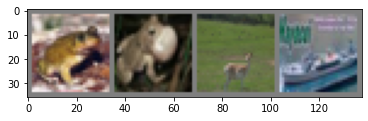

 frog  frog  deer  ship


In [13]:
images,labels=next(iter(trainloader))
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
import torch.nn as nn
import torch.nn.functional as F


***MODEL***

In [15]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool =nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x


net=Net()


Loss **Function** and **Optimizer**

In [16]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

**TRAIN NETWORK**

In [19]:
for epoch in range(3):
  running_loss=0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    optimizer.zero_grad()
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()


    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d,%5d] loss:%.3f'%
            (epoch + 1 , i+1,running_loss/2000))
      running_loss=0.0

  print('finished training')


[1, 2000] loss:1.848
[1, 4000] loss:1.673
[1, 6000] loss:1.580
[1, 8000] loss:1.534
[1,10000] loss:1.487
[1,12000] loss:1.452
finished training
[2, 2000] loss:1.390
[2, 4000] loss:1.354
[2, 6000] loss:1.327
[2, 8000] loss:1.314
[2,10000] loss:1.304
[2,12000] loss:1.269
finished training
[3, 2000] loss:1.212
[3, 4000] loss:1.210
[3, 6000] loss:1.215
[3, 8000] loss:1.228
[3,10000] loss:1.181
[3,12000] loss:1.175
finished training


In [20]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

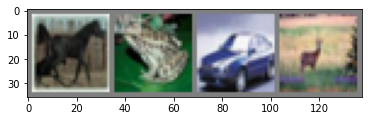

GroundTruth:  horse  frog   car  deer


In [21]:
dataiter = iter(testloader)
images, labels = next(iter(trainloader))

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [22]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [23]:
outputs = net(images)

In [24]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer  frog   car  deer


In [25]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [26]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 52 %
Accuracy of  bird : 39 %
Accuracy of   cat : 19 %
Accuracy of  deer : 48 %
Accuracy of   dog : 55 %
Accuracy of  frog : 83 %
Accuracy of horse : 64 %
Accuracy of  ship : 75 %
Accuracy of truck : 67 %
